In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
import random 
from statsmodels.tsa.stattools import pacf , acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess, arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

In [2]:
np.random.seed(1410)

In [3]:
data = pd.read_csv('Y.csv')
data

,X
0,-1.250000
1,-1.625000
2,-0.089286
3,0.291667
4,2.071429
...,...
2552,-5.000000
2553,-8.125000
2554,-5.250000
2555,-3.875000


In [4]:
model = ARIMA(data['X'],order=(2,0,2)).fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      X   No. Observations:                 2557
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5507.634
Date:                Wed, 08 Feb 2023   AIC                          11027.268
Time:                        14:37:36   BIC                          11062.348
Sample:                             0   HQIC                         11039.989
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0946      0.244     -0.388      0.698      -0.573       0.384
ar.L1          1.6118      0.044     36.528      0.000       1.525       1.698
ar.L2         -0.6232      0.038    -16.204      0.000      -0.699      -0.548
ma.L1         -0.8640      0.046    -18.626      0.000      -0.955      -0.773
ma.L2         -0.0688      0.027     -2.548      0.011      -0.122      -0.016
sigma2         4.3478      0.105     41.241      0.000       4.141       4.554
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.65
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.11
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
const, phi1, phi2 , theta1, theta2, sigma2 =  model.params
samples = arma_generate_sample(np.array([1,-phi1, -phi2]), np.array([1, theta1, theta2]),(len(data),10000),np.sqrt(sigma2)) + const
samples

array([[-1.61660518,  1.1883142 ,  2.51973878, ..., -3.54149826,
         0.12880258,  2.68519625],
       [ 0.0335332 , -0.37694594,  2.44854066, ..., -1.62086506,
         0.94373302,  5.46226601],
       [ 2.09043693,  0.24220909, -0.71783967, ...,  0.22080339,
         0.64307591,  4.6698709 ],
       ...,
       [-1.59250327,  0.89008066, -2.36091264, ..., -0.04175429,
         4.81954836,  1.03765521],
       [-1.12442587,  1.58894657, -3.58505063, ..., -0.86578121,
         7.13166574,  4.04765019],
       [ 0.18632332, -4.36378007, -4.9556159 , ..., -4.72386277,
         3.30570206,  5.28566572]])

In [20]:
sigma2

4.347806205478562

In [21]:
pacf_values = np.apply_along_axis(pacf,0,samples)
up_quantail_pacf =np.apply_along_axis(np.quantile,1,pacf_values,0.9)
down_quantail_pacf =np.apply_along_axis(np.quantile,1,pacf_values,0.1)
acf_values = np.apply_along_axis(pacf,0,samples)
up_quantail_acf =np.apply_along_axis(np.quantile,1,acf_values,0.9)
down_quantail_acf =np.apply_along_axis(np.quantile,1,acf_values,0.1)

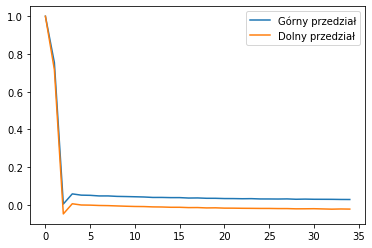

In [22]:
sns.lineplot(x=np.arange(len(up_quantail_pacf)), y=up_quantail_pacf,label="Górny przedział")
sns.lineplot(x=np.arange(len(down_quantail_pacf)), y=down_quantail_pacf,label="Dolny przedział")

In [23]:
df_acf_pcf =pd.DataFrame({"lag": np.arange(len(up_quantail_pacf)),
                            "up_acf":up_quantail_acf,
                             "down_acf":down_quantail_acf,
                             "up_pacf":up_quantail_pacf,
                             "down_pacf":down_quantail_pacf})

df_acf_pcf.to_csv("data/acf_pacf_data.csv",index=False)

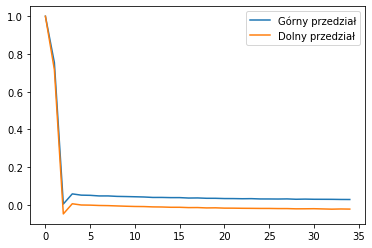

In [24]:
sns.lineplot(x=np.arange(len(up_quantail_acf)), y=up_quantail_acf,label="Górny przedział")
sns.lineplot(x=np.arange(len(down_quantail_acf)), y=down_quantail_acf,label="Dolny przedział")

In [25]:
quantail_samples_09 =np.apply_along_axis(np.quantile,1,samples,0.9)
quantail_samples_01 =np.apply_along_axis(np.quantile,1,samples,0.1)
quantail_samples_095 =np.apply_along_axis(np.quantile,1,samples,0.95)
quantail_samples_005 =np.apply_along_axis(np.quantile,1,samples,0.05)

In [26]:
df_sample_quantails = pd.DataFrame({"orginal": data["X"],
                                    "sample_09":quantail_samples_09,
                                    "sample_01":quantail_samples_01,
                                    "sample_095":quantail_samples_095,
                                    "sample_005":quantail_samples_005 })
df_sample_quantails.to_csv("data/samples_quantails.csv",index=False)

c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

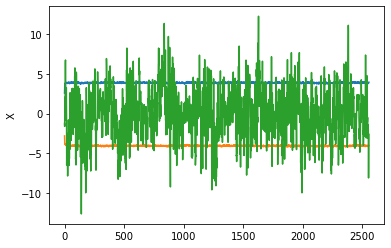

In [27]:
sns.lineplot(np.arange(len(data)), quantail_samples_09)
sns.lineplot(np.arange(len(data)), quantail_samples_01)
sns.lineplot(np.arange(len(data)), data["X"])

In [28]:
df = pd.DataFrame(model.resid,columns=["Residua"])
df.to_csv('data/residua.csv',index=False)

In [29]:
residua_acf = acf(model.resid)
residua_pacf = pacf(model.resid)


In [30]:
df_residua_acf_pacf = pd.DataFrame({"lag": np.arange(len(residua_acf)),
                                    "acf": residua_acf,
                                    "pacf": residua_pacf})
df_residua_acf_pacf.to_csv('data/residua_acf_pacf.csv',index=False)

In [31]:
df_residua_acf_pacf

,lag,acf,pacf
0,0,1.000000,1.000000
1,1,-0.000525,-0.000525
2,2,-0.010352,-0.010360
3,3,0.009520,0.009521
4,4,-0.000268,-0.000366
5,5,0.015211,0.015441
6,6,0.002108,0.002030
7,7,-0.004863,-0.004551
8,8,0.036397,0.036272
9,9,-0.002066,-0.002180
